In [ ]:
!pip install sexmachine
import pandas as pd
import numpy as np
import sexmachine.detector as gender

     |████████████████████████████████| 337kB 5.7MB/s 
  Created wheel for sexmachine: filename=SexMachine-0.1.1-cp37-none-any.whl size=379455 sha256=56a2eedb8cf88222536aea91acc496a0cd73213e5b3aa410660a9efc92d5aaf3
  Stored in directory: /root/.cache/pip/wheels/bc/d2/38/79cfa6cc80d3dbb7f952a8e578fd41597acc24c53df5feb8d6
Successfully built sexmachine


In [ ]:
!pip install sklearn

In [ ]:
import sys
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.svm import SVC
import sexmachine.detector as gender
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# from sklearn.learning_curve import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
from  sklearn.ensemble import RandomForestClassifier

In [ ]:
gusers=pd.read_csv('users.csv')
fusers=pd.read_csv('fusers.csv')

In [ ]:
gusers.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,1.481000e+03,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,397.0,4.0,719.0,1423.0,486.0,1063.000000,0.0,0.0
mean,4.000432e+08,3140.782579,690.922350,403.128292,439.611749,5.360567,1.0,1.0,1.0,1.0,1.0,1535.841957,NaN,NaN
std,2.961304e+08,6391.957957,11058.508986,610.572368,1970.556008,32.183232,0.0,0.0,0.0,0.0,0.0,7805.690161,NaN,NaN
min,3.610511e+06,3.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,1.572905e+08,315.000000,45.000000,115.000000,4.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
50%,3.822478e+08,992.000000,102.000000,226.000000,29.000000,1.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
75%,5.229255e+08,3029.000000,259.000000,437.000000,176.000000,2.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
max,1.219743e+09,79876.000000,408372.000000,12773.000000,44349.000000,744.000000,1.0,1.0,1.0,1.0,1.0,36000.000000,NaN,NaN


In [ ]:
fusers.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,1.337000e+03,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,0.0,1331.0,4.0,2.0,1337.0,3.0,6.000000,0.0,0.0
mean,6.897381e+08,45.442034,16.842184,386.761406,7.383695,0.002992,NaN,1.0,1.0,1.0,1.0,1.0,-8700.000000,NaN,NaN
std,2.135086e+08,97.765536,8.011299,210.139672,89.155940,0.054636,NaN,0.0,0.0,0.0,0.0,0.0,31247.847926,NaN,NaN
min,3.738459e+07,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,6.163001e+08,26.000000,13.000000,278.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-36000.000000,NaN,NaN
50%,6.170879e+08,36.000000,18.000000,344.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-8100.000000,NaN,NaN
75%,6.192317e+08,53.000000,22.000000,538.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,19800.000000,NaN,NaN
max,1.391998e+09,1576.000000,73.000000,1998.000000,1402.000000,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,19800.000000,NaN,NaN


In [ ]:
fusers.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,NaN,en,NaN,NaN,NaN,NaN,NaN,http://a0.twimg.com/profile_images/3146805145/...,https://twimg0-a.akamaihd.net/profile_banners/...,1,https://twimg0-a.akamaihd.net/profile_backgrou...,333333,https://twimg0-a.akamaihd.net/profile_images/3...,FFFFFF,NaN,DDEEF6,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,NaN,en,NaN,Kuwait,1.0,NaN,NaN,http://a0.twimg.com/profile_images/1642325536/...,NaN,1,https://si0.twimg.com/images/themes/theme1/bg.png,333333,https://si0.twimg.com/profile_images/164232553...,C0DEED,NaN,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,in Kuwait with my buetiful family.,2015-02-14 10:40:01,INT
2,72110028,Deepak,dedjven,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,NaN,en,International Date Line West,India,NaN,NaN,1.0,http://a0.twimg.com/profile_images/1143114846/...,NaN,1,https://si0.twimg.com/images/themes/theme14/bg...,333333,https://si0.twimg.com/profile_images/114311484...,EEEEEE,1.0,EFEFEF,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,-39600.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT
3,82885728,Marcos Vinicius,BrowAlves,573,14,227,530,0,Fri Oct 16 14:02:48 +0000 2009,NaN,en,NaN,Rio de Janeiro,NaN,NaN,NaN,http://a0.twimg.com/profile_images/2630736938/...,NaN,1,https://si0.twimg.com/profile_background_image...,1F1D1F,https://si0.twimg.com/profile_images/263073693...,C0DEED,NaN,DDEEF6,http://a0.twimg.com/profile_background_images/...,C0DEED,0084B4,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
4,110120789,Shri Kant Kanaujia,kanaujiask,675,18,519,653,0,Sun Jan 31 12:08:41 +0000 2010,NaN,en,New Delhi,lucknow,1.0,1.0,NaN,http://a0.twimg.com/sticky/default_profile_ima...,NaN,1,https://si0.twimg.com/images/themes/theme1/bg.png,333333,https://si0.twimg.com/sticky/default_profile_i...,C0DEED,NaN,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,19800.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT


In [ ]:
fusers.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset'],
      dtype='object')

In [ ]:
gusers.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,it,Rome,Roma,NaN,NaN,NaN,http://a0.twimg.com/profile_images/1575057050/...,https://si0.twimg.com/profile_banners/3610511/...,1.0,https://si0.twimg.com/profile_background_image...,0C3E53,https://si0.twimg.com/profile_images/157505705...,F2E195,NaN,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,en,Rome,"Rome, Italy",NaN,NaN,NaN,http://a0.twimg.com/profile_images/1901298312/...,NaN,1.0,https://si0.twimg.com/images/themes/theme1/bg.png,333333,https://si0.twimg.com/profile_images/190129831...,FFFFFF,NaN,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,en,Rome,Internets,NaN,NaN,NaN,http://a0.twimg.com/profile_images/1640620850/...,https://si0.twimg.com/profile_banners/5682702/...,1.0,https://si0.twimg.com/profile_background_image...,666666,https://si0.twimg.com/profile_images/164062085...,181A1E,1.0,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,en,Rome,NaN,NaN,NaN,1.0,http://a0.twimg.com/profile_images/2797534662/...,https://si0.twimg.com/profile_banners/6067292/...,1.0,https://si0.twimg.com/images/themes/theme4/bg.gif,3C3940,https://si0.twimg.com/profile_images/279753466...,FFFFFF,NaN,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,it,Rome,"iPhone: 44.069630,12.569966",NaN,NaN,1.0,http://a0.twimg.com/profile_images/1073412966/...,NaN,1.0,https://si0.twimg.com/images/themes/theme18/bg...,333333,https://si0.twimg.com/profile_images/107341296...,EEEEEE,NaN,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13


In [ ]:
gusers.shape

(1481, 34)

In [ ]:
fusers.shape

(1337, 34)

In [ ]:
x=pd.concat([gusers,fusers])

In [ ]:
y=len(gusers)*[1]+len(fusers)*[0]

In [ ]:
print(x)
print(y)

              id              name  ...              updated  dataset
0        3610511  Davide Dellacasa  ...  2015-02-14 10:54:49      E13
1        5656162    Simone Economo  ...  2015-02-14 10:54:49      E13
2        5682702            tacone  ...  2015-02-14 10:54:49      E13
3        6067292          alesaura  ...  2015-02-14 10:54:49      E13
4        6015122            Angelo  ...  2015-02-14 10:54:49      E13
...          ...               ...  ...                  ...      ...
1332  1391497074       Verda Marks  ...  2015-02-14 10:40:01      INT
1333  1391544607   Danial Campbell  ...  2015-02-14 10:40:01      INT
1334  1391622127      Maudie Meyer  ...  2015-02-14 10:40:01      INT
1335  1391832212   Harriett Harvey  ...  2015-02-14 10:40:01      INT
1336  1391998039   Gillian Wheeler  ...  2015-02-14 10:40:01      INT

[2818 rows x 34 columns]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# feature engineering



def extract_features(x):
    lang_list = list(enumerate(np.unique(x['lang'])))   
    lang_dict = { name : i for i, name in lang_list }             
    x.loc[:,'lang_code'] = x['lang'].map( lambda x: lang_dict[x]).astype(int)    
    feature_columns_to_use = ['statuses_count','followers_count','friends_count','favourites_count','listed_count','lang_code']
    x=x.loc[:,feature_columns_to_use]
    return x
  
x=extract_features(x)

In [ ]:
x


,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang_code
0,20370,5470,2385,145,52,5
1,3131,506,381,9,40,1
2,4024,264,87,323,16,1
3,40586,640,622,1118,32,1
4,2016,62,64,13,0,5
...,...,...,...,...,...,...
1332,1,0,17,0,0,1
1333,0,1,17,0,0,1
1334,2,0,15,0,0,1
1335,2,0,16,0,0,1


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)

In [ ]:
""" Trains and predicts dataset with a SVM classifier """
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_train=mm.fit_transform(X_train)
x_test=mm.transform(X_test)
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
print("training accuracy:", model.score(x_train,y_train))
print("testing accuracy:",model.score(x_test,y_test))




[1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1
 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0
 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1
 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1
 1 0 1 0 1 0 1 0 1 0 0 1 

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[267   0]
 [ 23 274]]


In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

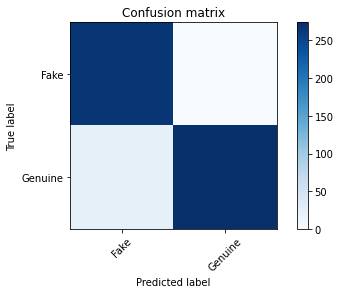

In [ ]:
plot_confusion_matrix(cm)